# Steps
1. Load data
2. Slice to isolate star/quasar in a single wavelength
3. Sum
4. Fits

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from mpdaf.obj import deg2sexa
from mpdaf.obj import Cube, Spectrum
from mpdaf.drs import PixTable
from mpdaf.obj import WCS

import astropy.units as u
from astropy.modeling import models, fitting
from astropy.io import fits

from scipy.optimize import curve_fit

### <div style="background-color:plum; padding: 5px"><h2>1. SDSSJ1515+1511</h2>

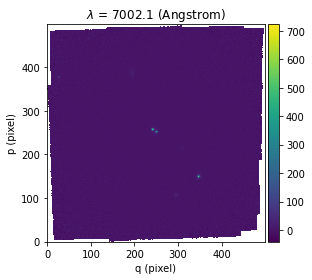

In [40]:
cube1 = Cube('D:\Datacube\SDSSJ1515+1511\ADP.2024-05-27T19_17_04.532.fits')

#ima1 = cube1[1974, :, :]
ima1 = cube1[1842, :, :]

plt.figure()
ima1.plot(zscale=False, show_xlabel=True, show_ylabel=True, colorbar='v', 
          title = '$\lambda$ = %.1f (%s)' %(cube1.wave.coord(1842), cube1.wave.unit))

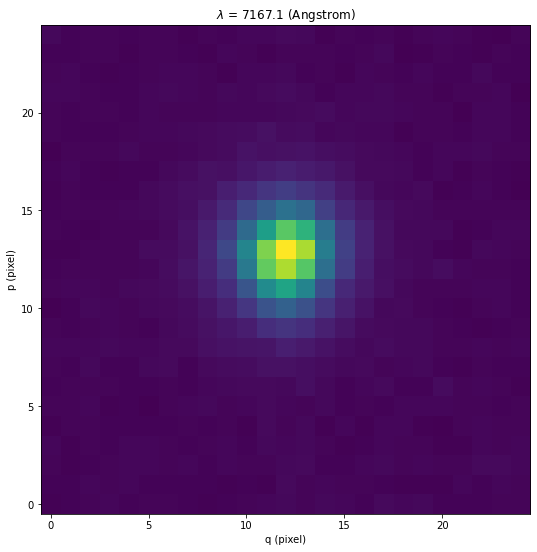

In [41]:
plt.figure(figsize=(12,9))
#ima1_zoom = cube1[1974, 245:265, 235:255]
ima1_zoom = cube1[1974, 137:162, 335:360]

ima1_zoom.plot(zscale=False, show_xlabel=True, show_ylabel=True, title = '$\lambda$ = %.1f (%s)' %(cube1.wave.coord(1974), cube1.wave.unit))

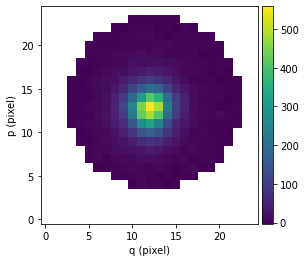

In [42]:
ima1_zoom.mask_region(center=[13, 12], radius=10., unit_center=None, unit_radius=None, inside=False)

plt.figure()
ima1_zoom.plot(colorbar='v', show_xlabel=True, show_ylabel=True)

In [43]:
seg1 = ima1_zoom.segment(minsize=2, background=0)
seg1

[<Image(shape=(25, 25), unit='1e-20 erg / (Angstrom cm2 s)', dtype='float64')>]

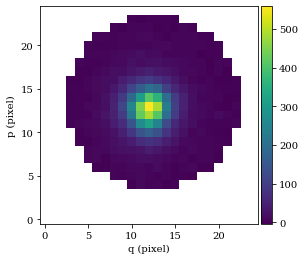

In [44]:
source1 = seg1[0]
plt.figure()
plt.rcParams['font.family'] = 'serif'

source1.plot(show_xlabel=True, show_ylabel=True, colorbar='v')

In [59]:
source1.background()

(22.821222570550802, 25.7287103356669)

In [60]:
source1.peak()

{'x': 228.9051635136149,
 'y': 15.188021380117178,
 'p': 14.85110983128922,
 'q': 11.994919836058108,
 'data': 558.5460205078125}

In [45]:
source1.moffat_fit(plot=True)

[INFO] center = (15.188,228.905) (error:(7.06114e-07,6.86679e-07))
[INFO] integrated flux = 11757.8 (error:0.000103952)
[INFO] peak value = 591.195 (error:8.42863)
[INFO] fwhm = (0.725127,0.682639) (error:(0.0598189,7.41225))
[INFO] n = 2.59868 (error:0.115365)
[INFO] rotation in degree: 172.919 (error:4.05686)
[INFO] continuum = 0.591415 (error:0.391586)


In [95]:
help(source1.moffat_fit)

Help on method moffat_fit in module mpdaf.obj.image:

moffat_fit(pos_min=None, pos_max=None, center=None, fwhm=None, flux=None, n=2.0, circular=False, cont=0, fit_back=True, rot=0, peak=False, factor=1, weight=True, plot=False, unit_center=Unit("deg"), unit_fwhm=Unit("arcsec"), verbose=True, full_output=0, fit_n=True, maxiter=0) method of mpdaf.obj.image.Image instance
    Perform moffat fit on image.
    
    Parameters
    ----------
    
    pos_min : (float,float)
        Minimum y and x values. Their unit is given by the unit_center
        parameter (degrees by default).
    pos_max : (float,float)
        Maximum y and x values. Their unit is given by the unit_center
        parameter (degrees by default).
    center : (float,float)
        Initial moffat center (y_peak,x_peak). If None it is estimated.
        The unit is given by the unit_center parameter (degrees by
        default).
    flux : float
        Initial integrated gaussian flux or gaussian peak value if peak is
 

In [46]:
(0.725127 + 0.682639) / 2

0.703883

In [91]:
source1.gauss_fit(plot=True)

[INFO] Gaussian center = (15.188,228.905) (error:(1.21134e-06,1.17123e-06))
[INFO] Gaussian integrated flux = 9877.04 (error:113.763)
[INFO] Gaussian peak value = 476.098 (error:-4.53124)
[INFO] Gaussian fwhm = (0.880645,0.83162) (error:(0.00926762,0.00874177))
[INFO] Rotation in degree: 174.632 (error:1.06349)
[INFO] Gaussian continuum = 5.16858 (error:0.349974)


In [47]:
coord1a = ima1_zoom.wcs.pix2sky((13, 12))
coord1b = ima1_zoom.wcs.pix2sky((14, 13))

coord1 = (coord1a + coord1b) / 2

coord1sexa = deg2sexa(coord1)
coord1sexa

array([['15:11:17.00674561', '15:15:37.23226505']], dtype='<U17')

### <div style="background-color:plum; padding: 5px"><h2>2. SDSSJ1320+1644</h2>

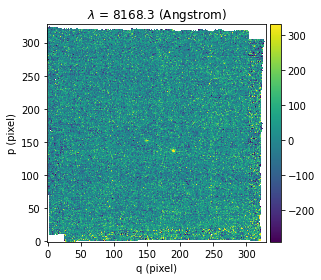

In [31]:
cube2 = Cube('D:\Datacube\SDSSJ1320+1644\ADP.2017-09-11T10_03_56.634.fits')

ima2 = cube2[2735, :, :]

plt.figure()
ima2.plot(zscale=True, show_xlabel=True, show_ylabel=True, colorbar='v', title = '$\lambda$ = %.1f (%s)' %(cube2.wave.coord(2735), cube2.wave.unit))

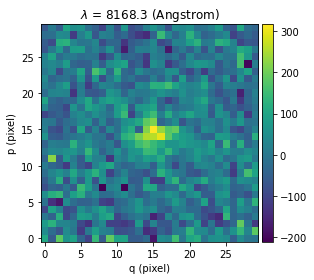

In [32]:
plt.figure()
ima2_zoom = cube2[2735, 138:168, 135:165]
ima2_zoom.plot(zscale=False, show_xlabel=True, show_ylabel=True, colorbar='v', title = '$\lambda$ = %.1f (%s)' %(cube2.wave.coord(2735), cube2.wave.unit))

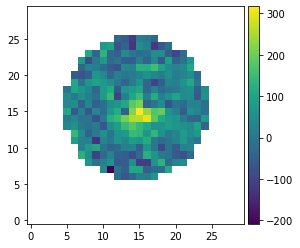

In [33]:
ima2_zoom.mask_region(center=[15, 14], radius=10., unit_center=None, unit_radius=None, inside=False)

plt.figure()
ima2_zoom.plot(colorbar='v')

In [34]:
seg2 = ima2_zoom.segment(minsize=4, background=0)
seg2

[<Image(shape=(30, 30), unit='1e-20 erg / (Angstrom cm2 s)', dtype='float64')>]

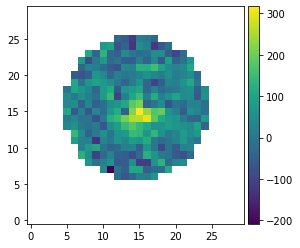

In [35]:
source2 = seg2[0]
plt.figure()
source2.plot(colorbar='v')

In [36]:
print(source2.background())
print(source2.peak())

source2.moffat_fit(plot=True)
source2.gauss_fit(plot=True)

[INFO] center = (16.7345,200.249) (error:(8.53048e-06,1.20694e-05))


(24.4660106085696, 67.69183826902194)
{'x': 200.24888341874563, 'y': 16.734527247470965, 'p': 14.597197547424905, 'q': 14.962672319725154, 'data': 316.6588439941406}


[INFO] integrated flux = 5482.97 (error:1.32813e+15)
[INFO] peak value = 247.289 (error:30.2384)
[INFO] fwhm = (1.05473,0.741791) (error:(5.77662e+06,3.09237e+07))
[INFO] n = 1527.34 (error:657486)
[INFO] rotation in degree: 87.7715 (error:10.6753)
[INFO] continuum = 10.6578 (error:4.32372)
[INFO] Gaussian center = (16.7345,200.249) (error:(8.50446e-06,1.20454e-05))
[INFO] Gaussian integrated flux = 5481.51 (error:620.917)
[INFO] Gaussian peak value = 247.229 (error:-20.3634)
[INFO] Gaussian fwhm = (1.05487,0.741985) (error:(0.0992142,0.075377))
[INFO] Rotation in degree: 87.8027 (error:9.17009)
[INFO] Gaussian continuum = 10.6611 (error:3.81258)


In [37]:
(1.05473 + 0.741791) / 2

0.8982604999999999

In [39]:
coord2a = ima2_zoom.wcs.pix2sky((15, 14))
coord2b = ima2_zoom.wcs.pix2sky((16, 15))

coord2 = (coord2a + coord2b) / 2

coord2sexa = deg2sexa(coord2)
coord2sexa

array([['16:44:04.47865085', '13:20:59.73846235']], dtype='<U17')

### <div style="background-color:plum; padding: 5px"><h2>3. WGD2038-4008</h2>

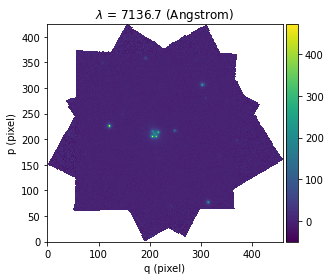

In [22]:
cube3 = Cube('D:\Datacube\WGD2038-4008\ADP.2021-05-17T13_27_36.504.fits')

ima3 = cube3[3338, :, :]

plt.figure()
ima3.plot(zscale=False, show_xlabel=True, show_ylabel=True, colorbar='v', title = '$\lambda$ = %.1f (%s)' %(cube3.wave.coord(1949), cube3.wave.unit))

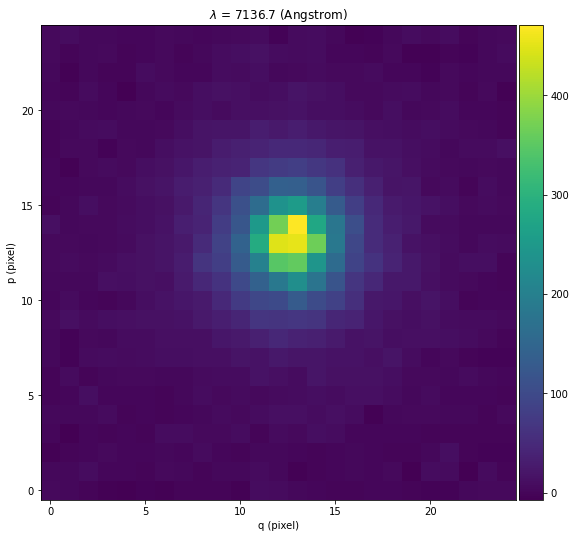

In [24]:
plt.figure(figsize=(9,12))
ima3_zoom = cube3[3338, 213:238, 108:133]
ima3_zoom.plot(zscale=False, show_xlabel=True, show_ylabel=True, colorbar='v', title = '$\lambda$ = %.1f (%s)' %(cube3.wave.coord(1949), cube3.wave.unit))

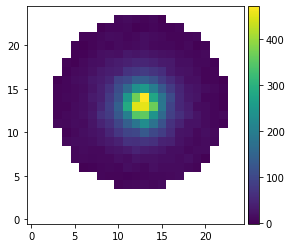

In [25]:
ima3_zoom.mask_region(center=[13, 12], radius=10., unit_center=None, unit_radius=None, inside=False)

plt.figure()
ima3_zoom.plot(colorbar='v')

In [26]:
seg3 = ima3_zoom.segment(minsize=2, background=0)
seg3

[<Image(shape=(25, 25), unit='1e-20 erg / (Angstrom cm2 s)', dtype='float64')>]

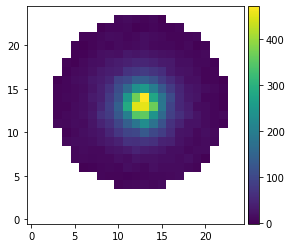

In [27]:
source3 = seg3[0]
plt.figure()
source3.plot(colorbar='v')

In [28]:
print(source3.background())
print(source3.peak())

source3.moffat_fit(plot=True)
source3.gauss_fit(plot=True)

[INFO] center = (-40.1364,309.518) (error:(8.9533e-07,8.66314e-07))
[INFO] integrated flux = 19227.1 (error:6.39876e-05)
[INFO] peak value = 492.533 (error:8.53624)
[INFO] fwhm = (0.770684,0.753934) (error:(0.0315799,3.3071))
[INFO] n = 1.4958 (error:0.0704452)
[INFO] rotation in degree: 11.7221 (error:12.5826)
[INFO] continuum = -2.16514 (error:1.01078)
[INFO] Gaussian center = (-40.1364,309.518) (error:(1.69554e-06,1.60793e-06))
[INFO] Gaussian integrated flux = 10310.4 (error:147.665)
[INFO] Gaussian peak value = 352.955 (error:-4.32161)
[INFO] Gaussian fwhm = (1.03008,1.0011) (error:(0.0139406,0.0130469))
[INFO] Rotation in degree: 4.74027 (error:1.58724)
[INFO] Gaussian continuum = 10.4687 (error:0.513036)


(22.416466393853938, 21.647722695932664)
{'x': 309.51780191915003, 'y': -40.136368423238906, 'p': 13.603638710904367, 'q': 12.8423332778752, 'data': 471.03790283203125}


In [29]:
(0.770684 + 0.753934) / 2

0.762309

In [30]:
coord3a = ima3_zoom.wcs.pix2sky((13, 12))
coord3b = ima3_zoom.wcs.pix2sky((14, 13))

coord3 = (coord3a + coord3b) / 2

coord3sexa = deg2sexa(coord3)
coord3sexa

array([['-40:08:10.94704633', '20:38:04.27843113']], dtype='<U18')

### <div style="background-color:plum; padding: 5px"><h2>4. 2M1310-1714</h2>

In [6]:
fits.info(r"D:\Datacube\2M1310-1714\2M.fits")

Filename: D:\Datacube\2M1310-1714\2M.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1895   ()      
  1  DATA          1 ImageHDU        43   (508, 503, 3722)   float32   
  2  STAT          1 ImageHDU        43   (508, 503, 3722)   float32   


In [2]:
fits.info('D:\Datacube\WFI2033-4723\ADP.2017-06-19T11_17_35.647.fits')

Filename: D:\Datacube\WFI2033-4723\ADP.2017-06-19T11_17_35.647.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1350   ()      
  1  DATA          1 ImageHDU        43   (322, 321, 3681)   float32   
  2  STAT          1 ImageHDU        43   (322, 321, 3681)   float32   


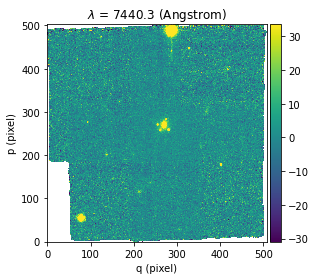

In [4]:
filename = r'D:\Datacube\2M1310-1714\2M.fits'
cube4 = Cube(filename)

ima4 = cube4[2192, :, :]

plt.figure()
ima4.plot(zscale=True, show_xlabel=True, show_ylabel=True, colorbar='v', title = '$\lambda$ = %.1f (%s)' %(cube4.wave.coord(2192), cube4.wave.unit))

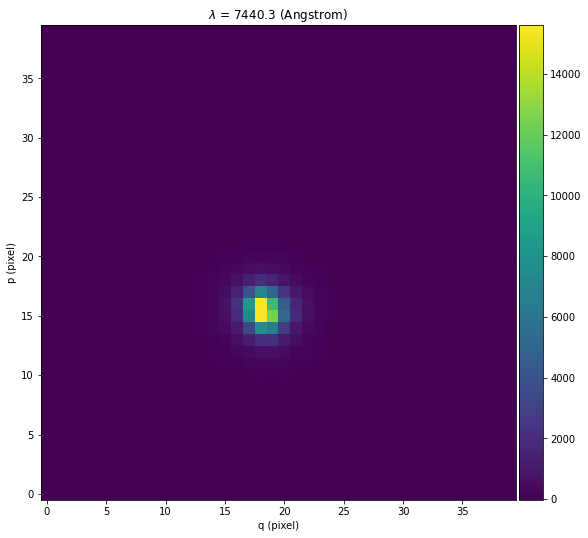

In [8]:
plt.figure(figsize=(9,12))
#ima4_zoom = cube4[2192, 250:290, 250:290]
ima4_zoom = cube4[2192, 40:80, 60:100]

ima4_zoom.plot(zscale=False, show_xlabel=True, show_ylabel=True, colorbar='v', title = '$\lambda$ = %.1f (%s)' %(cube4.wave.coord(2192), cube4.wave.unit))

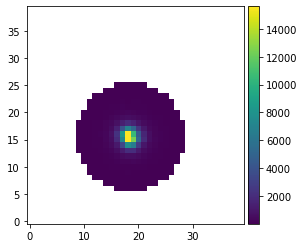

In [9]:
ima4_zoom.mask_region(center=[15, 18], radius=10., unit_center=None, unit_radius=None, inside=False)

plt.figure()
ima4_zoom.plot(colorbar='v')

In [10]:
seg4 = ima4_zoom.segment(minsize=2, background=25)
seg4

[<Image(shape=(40, 40), unit='1e-20 erg / (Angstrom cm2 s)', dtype='float64')>]

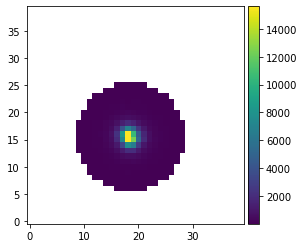

In [11]:
source4 = seg4[0]
plt.figure()
source4.plot(colorbar='v')

In [12]:
print(source4.background())
print(source4.peak())

source4.moffat_fit(plot=True)
source4.gauss_fit(plot=True)

[INFO] center = (-17.2614,197.595) (error:(4.63346e-07,4.45956e-07))
[INFO] integrated flux = 164994 (error:0.000237554)
[INFO] peak value = 18722.8 (error:309.266)
[INFO] fwhm = (0.48113,0.451731) (error:(0.0242157,3.9258))
[INFO] n = 2.55111 (error:0.0552824)
[INFO] rotation in degree: 41.9295 (error:3.01257)
[INFO] continuum = 19.5554 (error:1.83625)
[INFO] Gaussian center = (-17.2614,197.595) (error:(1.17017e-06,1.14563e-06))
[INFO] Gaussian integrated flux = 141877 (error:2481.99)
[INFO] Gaussian peak value = 12083.7 (error:-88.0407)
[INFO] Gaussian fwhm = (0.666089,0.622266) (error:(0.00817772,0.00777999))
[INFO] Rotation in degree: 37.0131 (error:0.994872)
[INFO] Gaussian continuum = 50.3974 (error:3.23493)


(99.9062237874836, 128.40354179653318)
{'x': 197.59471068599922, 'y': -17.26139558132249, 'p': 15.592366260291993, 'q': 18.218475614659773, 'data': 15610.06640625}


In [13]:
(0.48113 + 0.451731) / 2

0.46643049999999997

In [19]:
coord = ima4_zoom.wcs.pix2sky((15, 18))
coord2 = ima4_zoom.wcs.pix2sky((16, 19))

coord_final = (coord + coord2) / 2

coord_final_sexa = deg2sexa(coord_final)
coord_final_sexa

array([['-17:15:41.04257049', '13:10:22.72663405']], dtype='<U18')

In [20]:
ima4_zoom.wcs.get_step()

array([5.55555556e-05, 5.55555556e-05])

### <div style="background-color:plum; padding: 5px"><h2>5. RXJ1131-1231</h2>

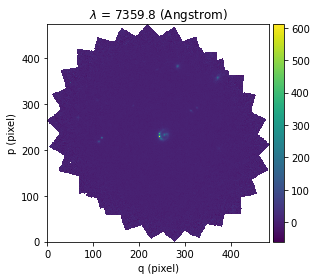

In [4]:
cube5 = Cube('D:\Datacube\RXJ1131-1231\ADP.2022-05-16T13_19_42.095.fits')

ima5 = cube5[2128, :, :]

plt.figure()
ima5.plot(zscale=False, show_xlabel=True, show_ylabel=True, colorbar='v', title = '$\lambda$ = %.1f (%s)' %(cube5.wave.coord(2128), cube5.wave.unit))
#ima5.plot(zscale=True, use_wcs=True)

#plt.xlabel("RA")
#plt.ylabel("Dec")

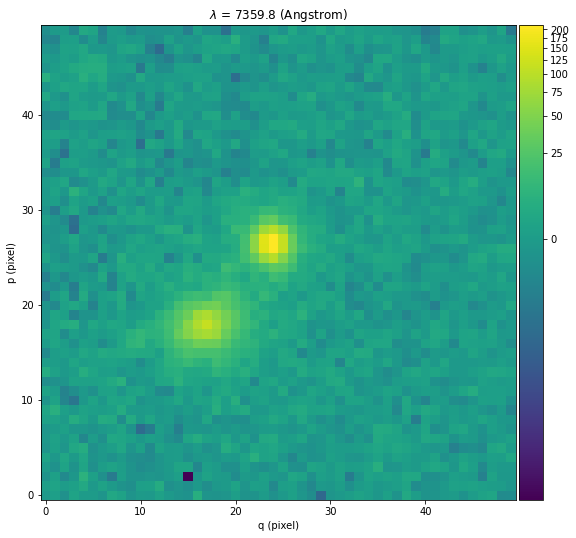

In [29]:
plt.figure(figsize=(9,12))
ima5_zoom = cube5[2128, 200:250, 95:145]
#ima5_zoom = cube5[2128, 218:250, 110:150]

ima5_zoom.plot(scale='log', show_xlabel=True, show_ylabel=True, colorbar='v', title = '$\lambda$ = %.1f (%s)' %(cube5.wave.coord(2128), cube5.wave.unit))

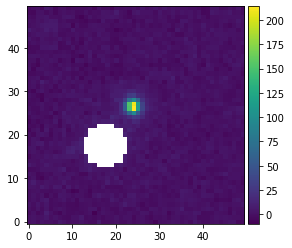

In [44]:
ima5_zoom.mask_region(center=[17, 17], radius=5., unit_center=None, unit_radius=None, inside=True)
plt.figure()
ima5_zoom.plot(colorbar='v')

In [45]:
seg5 = ima5_zoom.segment(minsize=2, background=15)
seg5

[<Image(shape=(8, 9), unit='1e-20 erg / (Angstrom cm2 s)', dtype='float64')>]

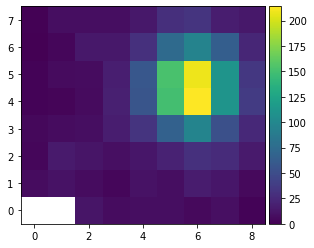

In [46]:
source5 = seg5[0]
plt.figure()
source5.plot(colorbar='v')

In [47]:
print(source5.background())
print(source5.peak())

source5.moffat_fit(plot=True)
source5.gauss_fit(plot=True)

[INFO] center = (-12.5333,172.972) (error:(8.80372e-07,8.35726e-07))
[INFO] integrated flux = 1967.86 (error:0.00548971)
[INFO] peak value = 235.74 (error:5.60903)
[INFO] fwhm = (0.496555,0.470472) (error:(0.211597,11.833))
[INFO] n = 3.54288 (error:0.613768)
[INFO] rotation in degree: 5.4823 (error:10.0631)
[INFO] continuum = 5.17612 (error:0.785506)
[INFO] Gaussian center = (-12.5333,172.972) (error:(1.10414e-06,1.04811e-06))
[INFO] Gaussian integrated flux = 1695.6 (error:34.0223)
[INFO] Gaussian peak value = 213.941 (error:-3.20674)
[INFO] Gaussian fwhm = (0.542522,0.515711) (error:(0.00952432,0.0090241))
[INFO] Rotation in degree: 5.32168 (error:1.15869)
[INFO] Gaussian continuum = 7.69419 (error:0.629718)


(17.590306475578295, 17.174898986768447)
{'x': 172.97185956909735, 'y': -12.533350480848485, 'p': 4.483657634428356, 'q': 5.845053413470257, 'data': 214.00672912597656}


In [48]:
(0.496555 + 0.470472) / 2

0.48351350000000004

In [49]:
coord = ima5_zoom.wcs.pix2sky((26, 23))
coord2 = ima5_zoom.wcs.pix2sky((27, 24))

coord_final = (coord + coord2) / 2

coord_final_sexa = deg2sexa(coord_final)
coord_final_sexa

array([['-12:32:00.05846033', '11:31:53.2510096']], dtype='<U18')